In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
names = open('../data/names.txt', 'r').read().splitlines()

names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
print(len(names))
print(min(len(n) for n in names))
print(max(len(n) for n in names))

32033
2
15


In [5]:
b = {}

for w in names:
    nw = ['<S>']+ list(w) +['<E>']
    for i in range(len(nw)-1):
        biagram = nw[i], nw[i+1]
        b[biagram] = b.get(biagram, 0)+1

In [6]:
dict(sorted(b.items(), key=lambda item: item[1], reverse=False))

{('q', 'r'): 1,
 ('d', 'z'): 1,
 ('p', 'j'): 1,
 ('q', 'l'): 1,
 ('p', 'f'): 1,
 ('q', 'e'): 1,
 ('b', 'c'): 1,
 ('c', 'd'): 1,
 ('m', 'f'): 1,
 ('p', 'n'): 1,
 ('w', 'b'): 1,
 ('p', 'c'): 1,
 ('h', 'p'): 1,
 ('f', 'h'): 1,
 ('b', 'j'): 1,
 ('f', 'g'): 1,
 ('z', 'g'): 1,
 ('c', 'p'): 1,
 ('p', 'k'): 1,
 ('p', 'm'): 1,
 ('x', 'n'): 1,
 ('s', 'q'): 1,
 ('k', 'f'): 1,
 ('m', 'k'): 1,
 ('x', 'h'): 1,
 ('g', 'f'): 1,
 ('v', 'b'): 1,
 ('j', 'p'): 1,
 ('g', 'z'): 1,
 ('v', 'd'): 1,
 ('d', 'b'): 1,
 ('v', 'h'): 1,
 ('h', 'h'): 1,
 ('g', 'v'): 1,
 ('d', 'q'): 1,
 ('x', 'b'): 1,
 ('w', 'z'): 1,
 ('h', 'q'): 1,
 ('j', 'b'): 1,
 ('x', 'm'): 1,
 ('w', 'g'): 1,
 ('t', 'b'): 1,
 ('z', 'x'): 1,
 ('p', 'b'): 2,
 ('t', 'g'): 2,
 ('q', 's'): 2,
 ('t', 'x'): 2,
 ('f', 'k'): 2,
 ('b', 't'): 2,
 ('j', 'n'): 2,
 ('k', 'c'): 2,
 ('z', 'k'): 2,
 ('s', 'j'): 2,
 ('s', 'f'): 2,
 ('z', 'j'): 2,
 ('n', 'q'): 2,
 ('f', 'z'): 2,
 ('h', 'g'): 2,
 ('w', 'w'): 2,
 ('k', 'j'): 2,
 ('j', 'k'): 2,
 ('w', 'm'): 2,
 ('z', '

In [7]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [ ]:
chars = sorted(list(set("".join(names))))

stoi = {c:i+1 for i, c in enumerate(chars)}
stoi['.'] = 0
itoi = {i:c for c, i in stoi.items()}

encode = lambda word : [stoi[c] for c in word]
decode = lambda tokens: "".join([itoi[tok] for tok in tokens])

In [9]:
for w in names:
    nw = ['.'] + list(w) + ['.']
    for i in range(len(w) - 1):
        idx1 = stoi[nw[i]]
        idx2 = stoi[nw[i+1]]
        N[idx1, idx2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

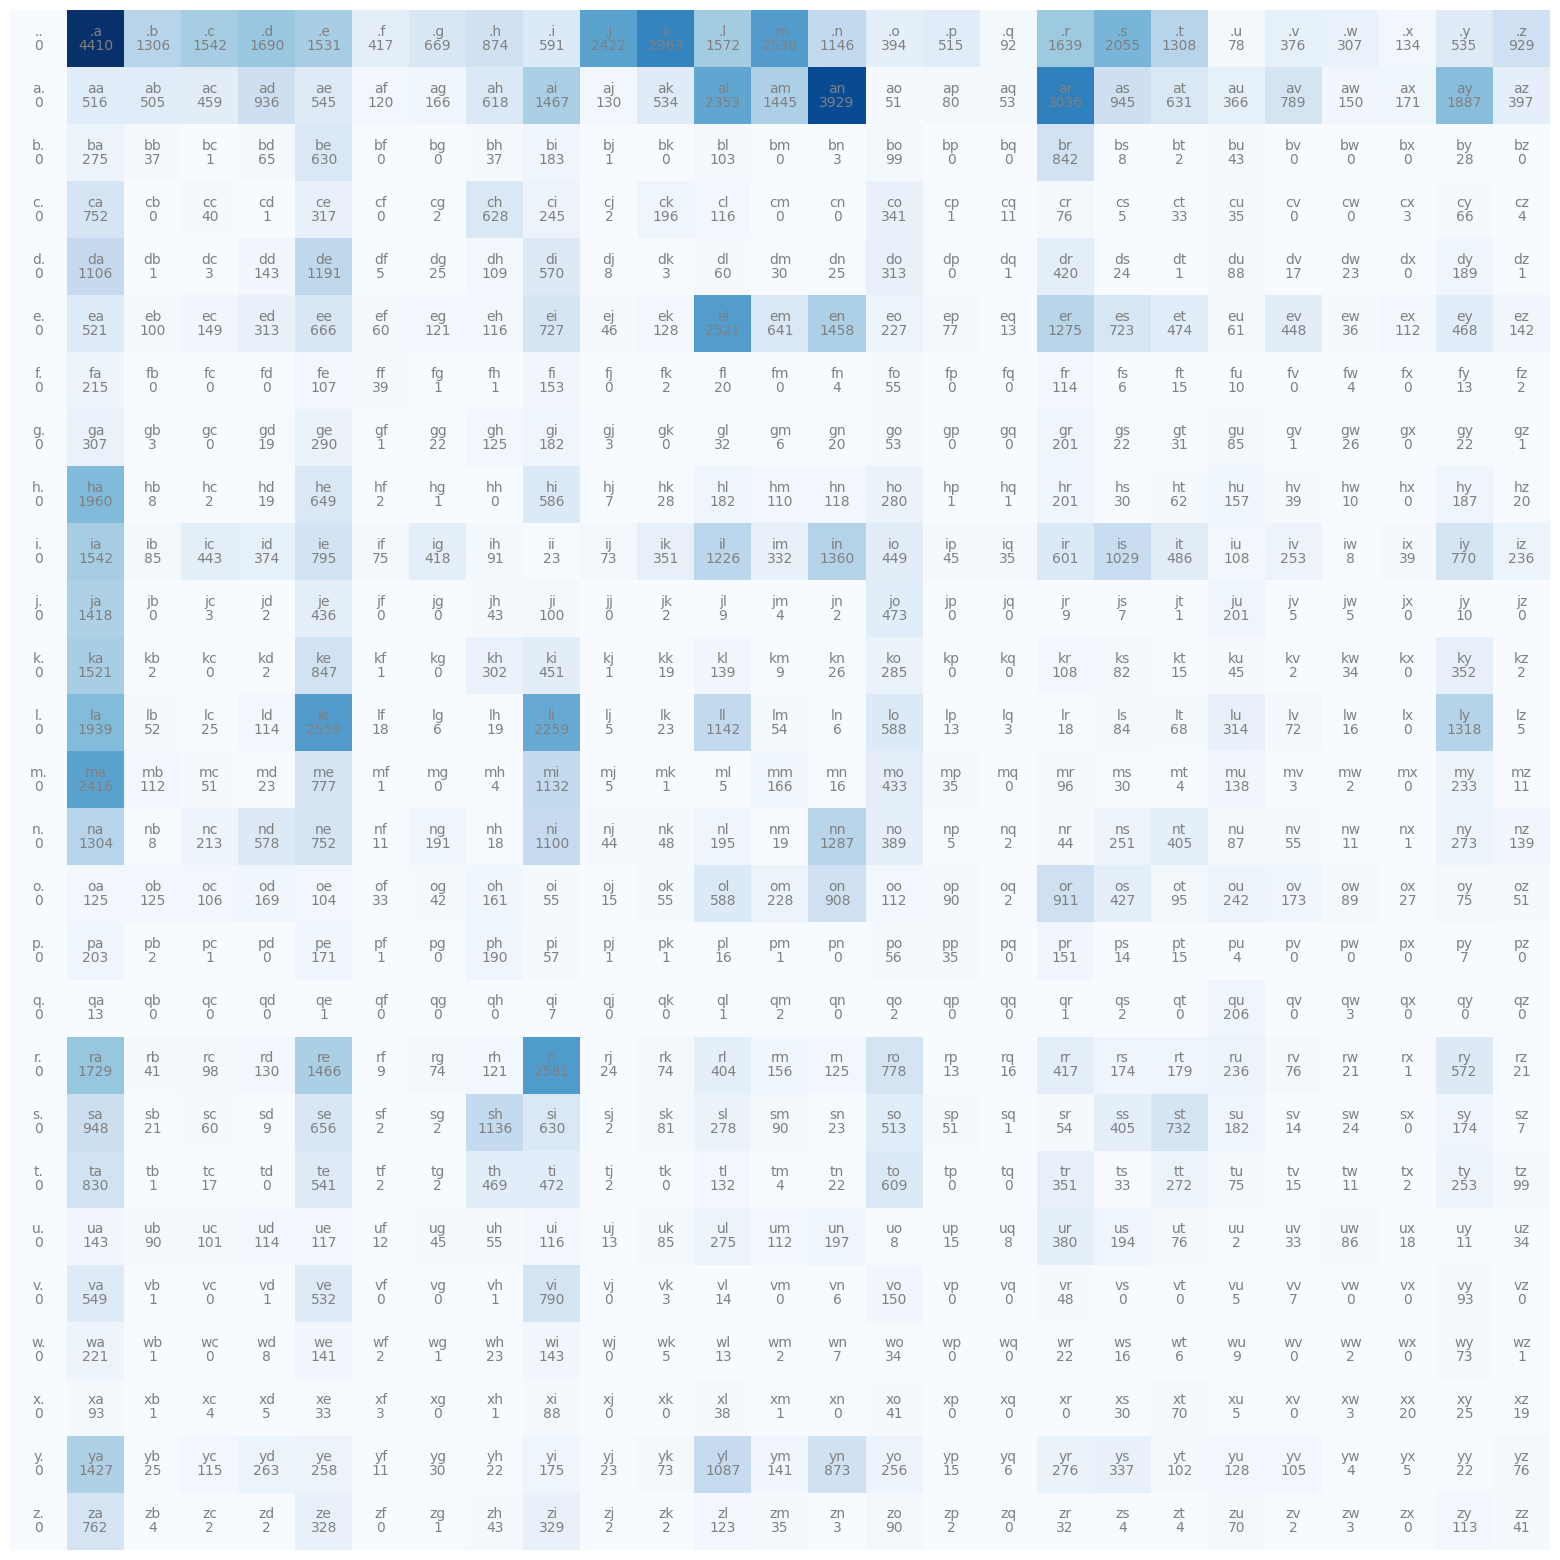

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itoi[i] + itoi[j]
        plt.text(j, i, chstr, ha='center', va='bottom',color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [ ]:
g = torch.Generator().manual_seed(2147483647)

ix = 0
while True:
    p = N[ix].float()
    print("raw:", p)

    p = p / p.sum()
    print("probs:", p)

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    print("sampled index:", ix, "->", itoi[ix])

    if ix == 0:
        break
